In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr

from pymc import HalfCauchy, Model, Normal, sample

In [2]:
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.1.1


In [3]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [4]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0,1,size)
true_regression_line = true_intercept + true_slope * x
y = true_regression_line + rng.normal(scale=0.5, size = size)

data = pd.DataFrame(dict(x=x, y=y))

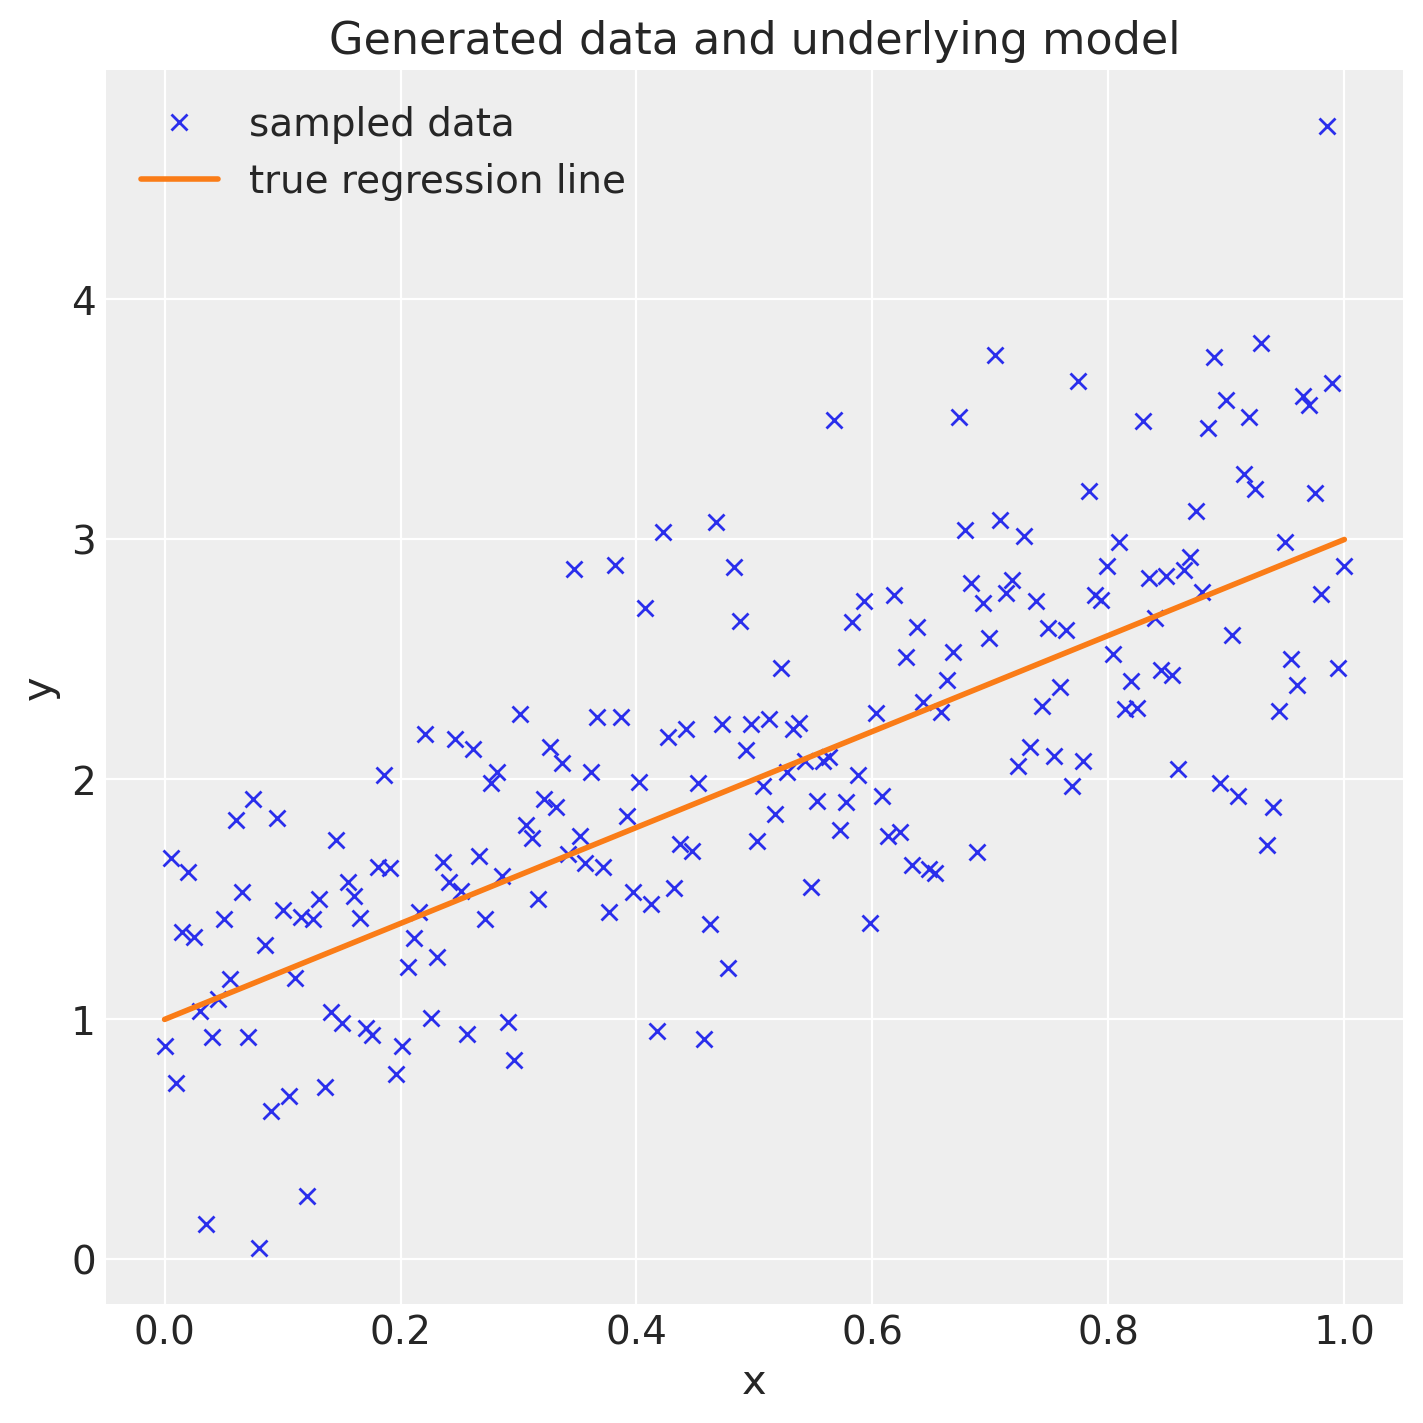

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title = "Generated data and underlying model")
ax.plot(x,y, "x", label = "sampled data")
ax.plot(x, true_regression_line, label = "true regression line", lw=2.0)
plt.legend(loc=0)

In [6]:
with Model() as model:
    sigma = HalfCauchy("sigma", beta = 10)
    intercept = Normal("intercept", 0 , sigma=20)
    slope = Normal("slope", 0, sigma=20)
    
    likelihood = Normal("y", mu = intercept + slope * x, sigma = sigma, observed=y)
    
    idata = sample(3000)

Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

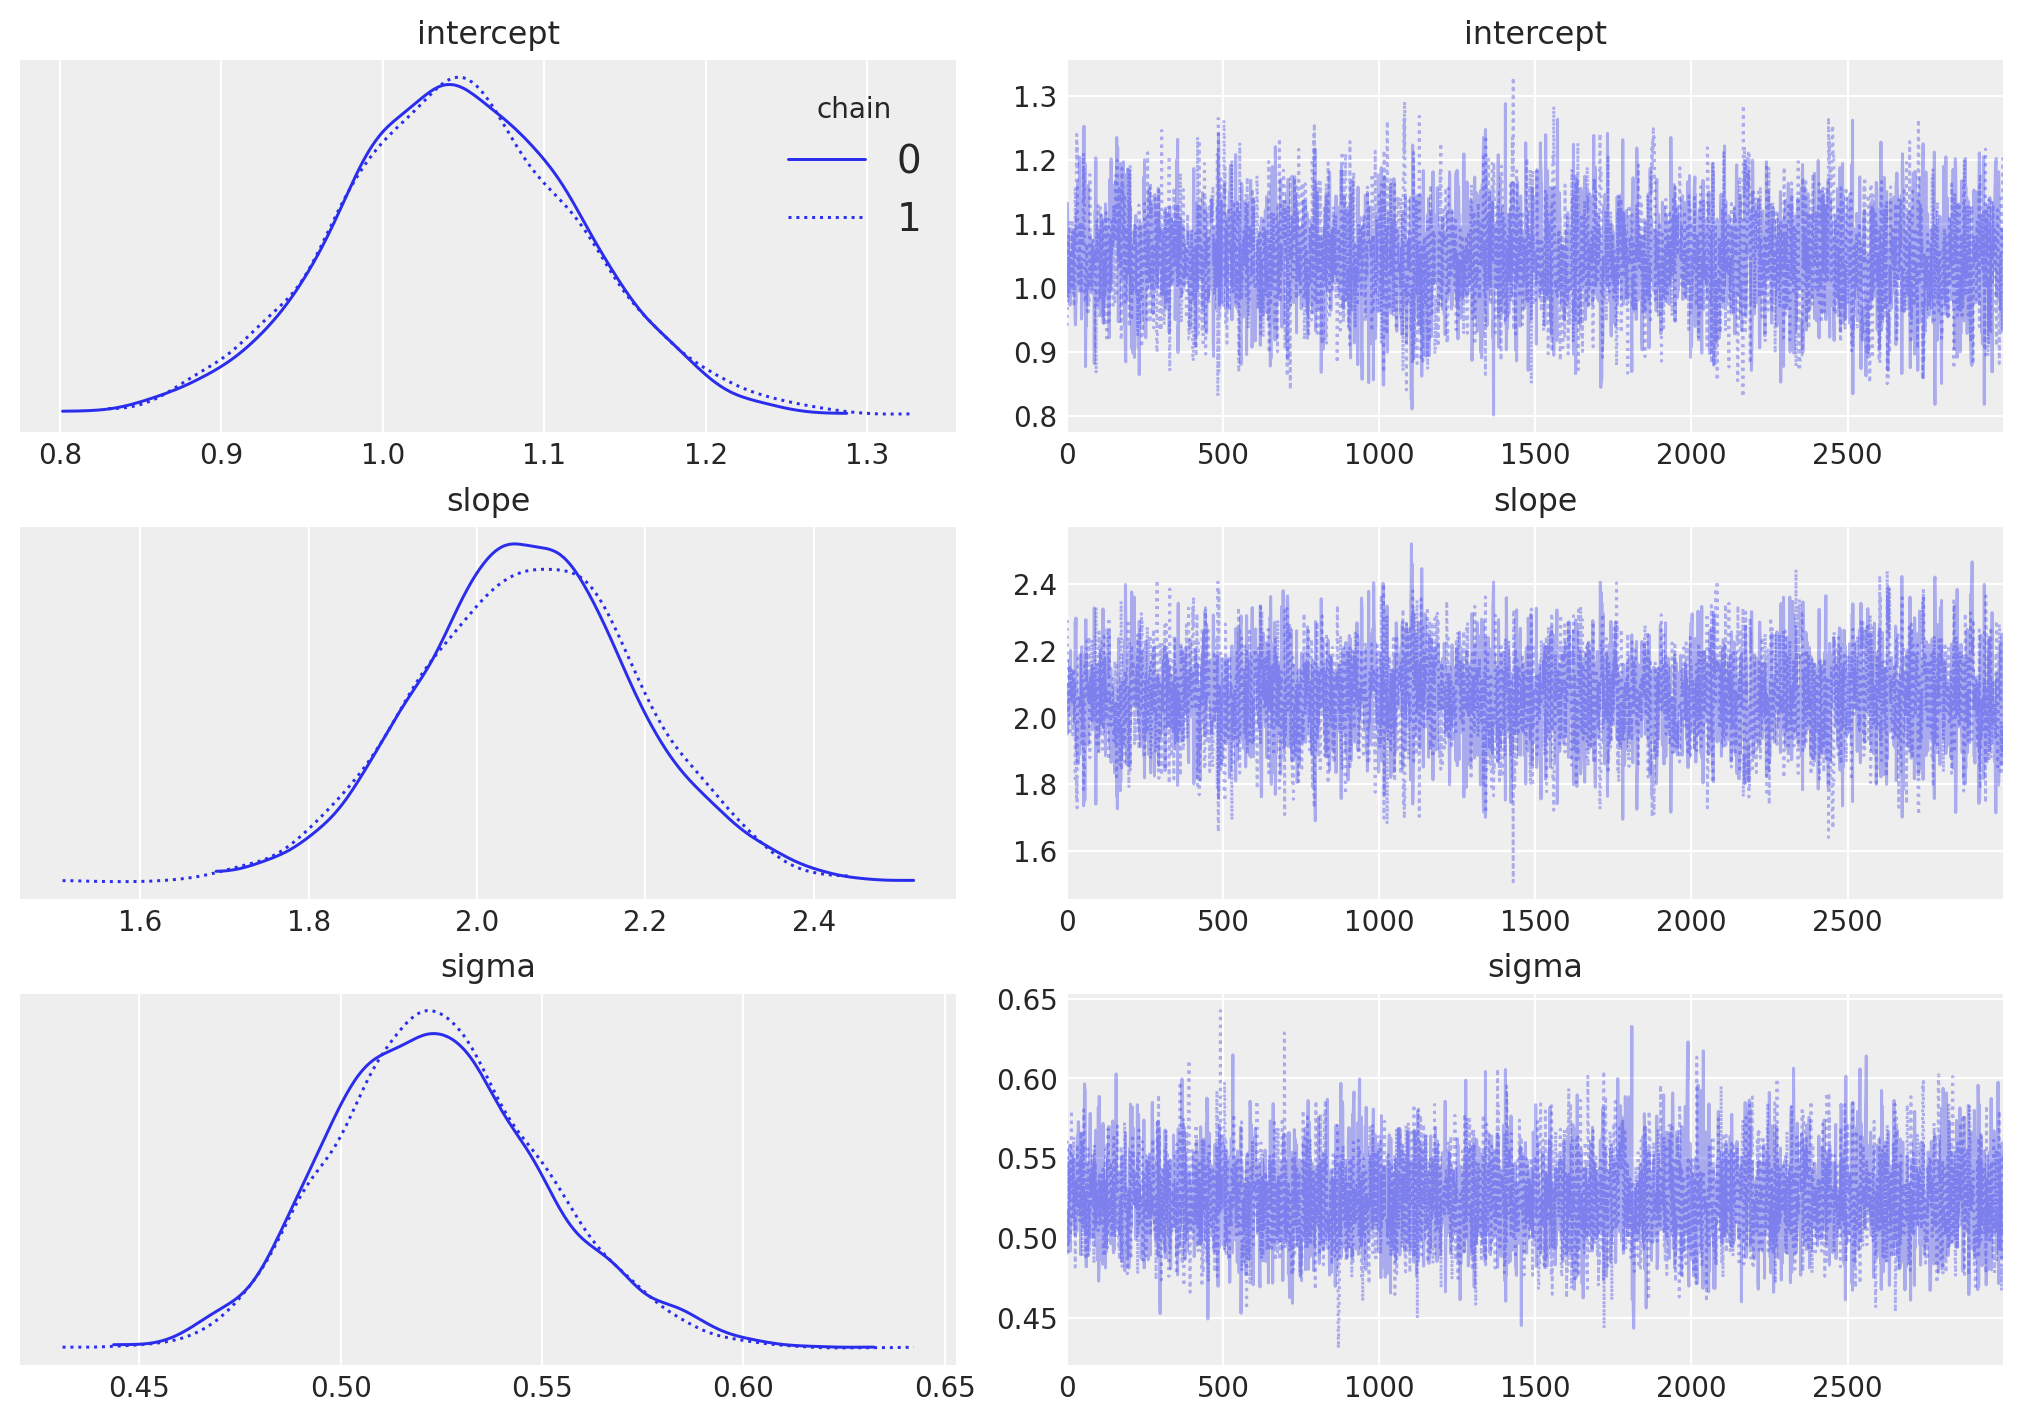

In [7]:
az.plot_trace(idata, figsize=(10, 7), legend=True)